In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

from pandas_profiling import ProfileReport

In [16]:
df = pd.read_csv('2021_model_data__202205201005.csv', infer_datetime_format=True)
df1 = pd.read_csv('2021_datacenter_5_site_nov_indicators_pivot__202205182248.csv', infer_datetime_format=True)

In [18]:
df['hour_stump'] = df['hour_stump'].values.astype('<M8[m]')
df1['hour_stump'] = df1['hour_stump'].values.astype('<M8[m]')


In [19]:
rkd_a = pd.merge(df, df1[['hour_stump', 'pm_74059_mw']], on='hour_stump')

In [21]:
df = rkd_a.sort_values('hour_stump')
df = rkd_a.set_index('hour_stump')


In [22]:
report_nov = ProfileReport(df)
report_nov

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df.columns

Index(['hashrate', 'operational', 'heat_index', 'pm_74059_mw'], dtype='object')

In [30]:
df = df.dropna(0)

/var/folders/25/1st06df16wj_drlv8cczhqs40000gn/T/ipykernel_34818/1059769157.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna(0)


In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## November data

In [31]:
y = df['hashrate']
x = df[['operational', 'heat_index', 'pm_74059_mw']]

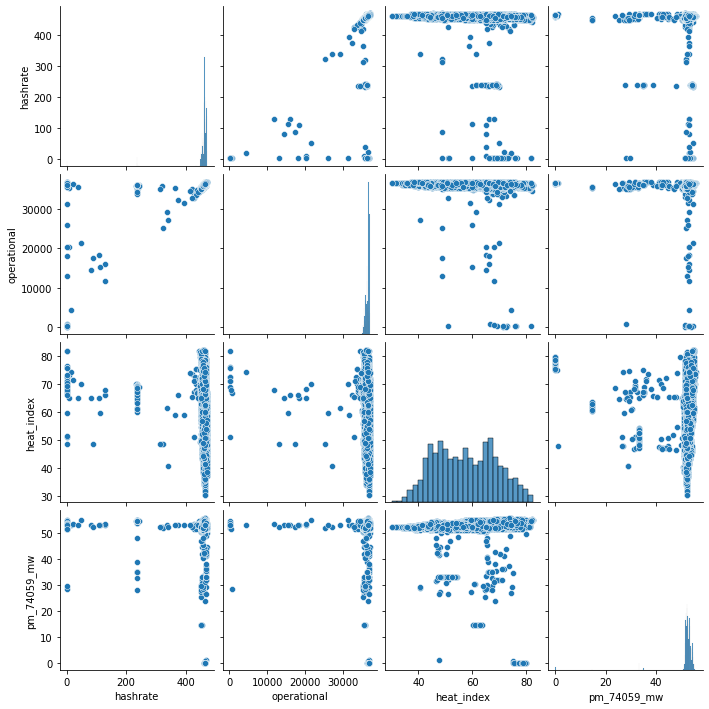

In [32]:
sns.pairplot(df)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

## Model

In [34]:
LR = linear_model.LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [35]:
y_prediction = LR.predict(x_test)
y_prediction

array([467.92632439, 454.53689097, 464.84032521, ..., 458.96529186,
       448.64369394, 453.97929889])

/Users/hermanoferreira/miniconda3/envs/sr_data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='hashrate'>

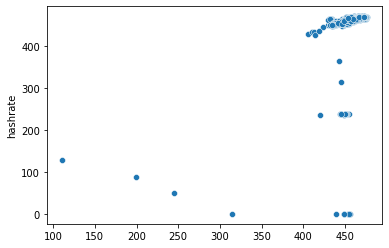

In [36]:
sns.scatterplot(y_prediction, y_test)

# Model validation

In [37]:
score=r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.18993862333581002
mean_sqrd_error is== 1635.9917846237277
root_mean_squared error of is== 40.447395276132774
